# Задание 2

## Проверим Pandas
Скачать с Kaggle [данные с температурой по городам](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities).

Если очень не хочется регистрироваться на сайте, архив *(2data.zip)* можно взять в папке с [заданием](https://disk.yandex.ru/d/MrtwhwSBdLuKKA).

In [1]:
import pandas as pd

Считать данные в `pandas.DataFrame`, посмотреть, что там лежит.

Если хотите вспомнить, как обращаться с DataFrame, могу порекомендовать [мини-курс](https://www.kaggle.com/code/residentmario/creating-reading-and-writing) на том же Kaggle:  там есть примеры всех нужных действий, сгруппированных на 6 страницах (считывание, обращение по индексу, изменение, типы данных).

Сколько записей имеют нулевое значение по полю State?

Нужно сравнить выполнение операции над числами с плавающей точкой и над целыми числами. Для этого в DateFrame следует создать новый столбец, в который будут записаны значения температуры, умноженные на 10 и приведенные к *int*.

In [13]:
import datetime

Замерить время исполнения операции с данными (например, подсчета среднего значения `mean()` для столбца).

Предлагаю использовать библиотеку **datetime**, но можете использовать любую другую.


## Проверка через numpy
Проверим то же самое для numpy массива. Для этого колонку `pd.Series` нужно привести к numpy массиву, явно указав тип данных. Для исходной температуры будет float64, для целочисленной - int16.

In [22]:
import numpy as np

Замерить время выполнения той же операции `mean()`.

# Задание 4

In [31]:
from PIL import Image

Загружаем изображение

In [33]:
im = Image.open('pic.jpg')

In [34]:
im.size

(1920, 1080)

In [35]:
import matplotlib.pyplot as plt

Посмотрим, что загрузилось

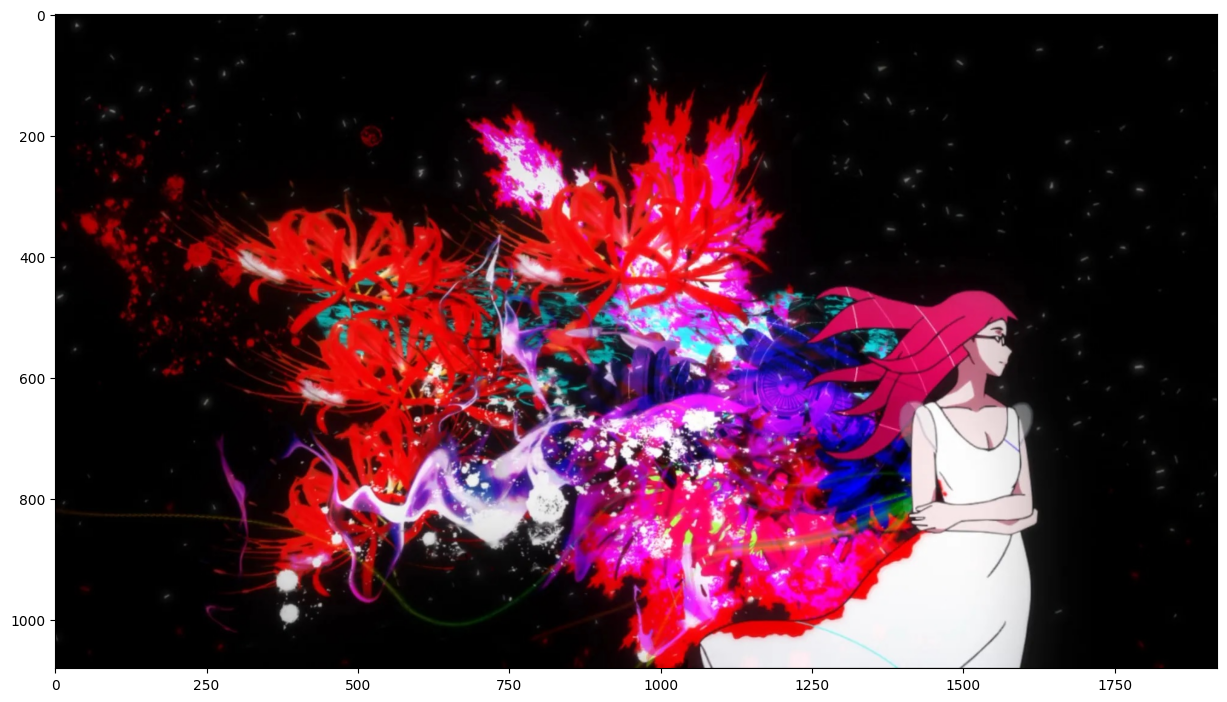

In [36]:
plt.figure(figsize=(15.,10.))
plt.imshow(im)

Переводим в трехмерный numpy массив (x, y, цвет).

In [42]:
a = np.asarray(im)
a[500:505, 495:500]

array([[[194,  24,  27],
        [203,  23,  24],
        [211,  21,  21],
        [218,  18,  20],
        [226,  16,  17]],

       [[185,  35,  36],
        [199,  36,  31],
        [206,  32,  25],
        [214,  27,  22],
        [220,  22,  19]],

       [[186,  64,  61],
        [197,  55,  43],
        [205,  48,  33],
        [210,  38,  26],
        [215,  31,  21]],

       [[200,  88,  77],
        [203,  67,  51],
        [209,  56,  38],
        [212,  45,  29],
        [216,  36,  22]],

       [[200,  74,  59],
        [208,  66,  46],
        [215,  56,  35],
        [217,  46,  29],
        [221,  38,  24]]], dtype=uint8)

Найдем фрагменты изображения, с нужным нам наличием/отсутствием цвета.

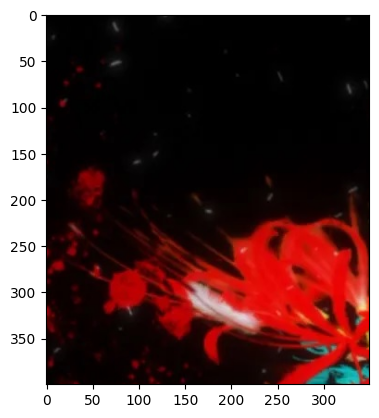

In [43]:
plt.imshow(a[100:500, 150:500])

**Красное:**

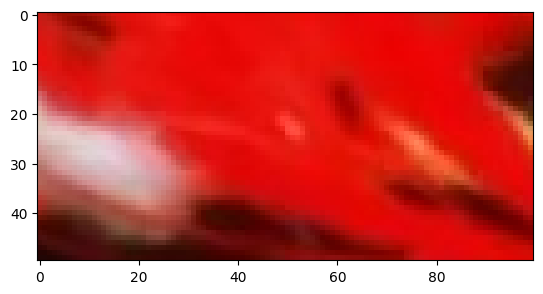

In [44]:
plt.imshow(a[400:450, 350:450])

**Не красное:**

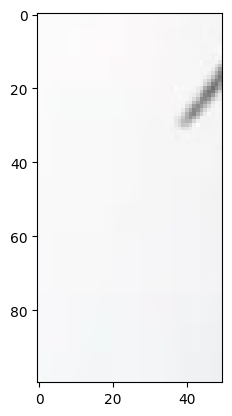

In [48]:
plt.imshow(a[900:1000, 1500:1550])

Подготовка набора данных для обучения.

Желательно, чередовать положительные и отрицательные примеры, при добавлении их в общий массив:

~~y = [0,0,0,1,1,1]~~

`y  = [0,1,0,1,0,1]`.

Должно получиться следующее (*для нейронки с 3-мя входами и одним выходом*):

|x_R|x_G|x_B|y_Target|
|---|---|---|---|
|255|255|0|1|
|0|0|255|0|



Делим данные на обучающую и тестовую выборки вручную **(без использования библиотеки sklearn)**.

Самый простой вариант: каждый **n**-й набор уходит в тестовую выборку.

Проверить, что и в обучающей и в тестовой выборке есть как положительные, так и отрицательные примеры.

Обучение, оценка результатов, вывод весовых коэффициентов

*Это происходит в лабе по другому предмету; когда будет готово, можно будет импортировать код библиотекой, подрубить класс нейронки и проверить, как она работает* :)

Проверка работы `Image.fromarray()` для вывода результатов обучения

(5, 5)


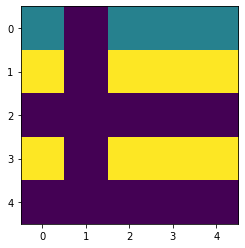

In [ ]:
var_1 = np.array([[300,0,300,300,300],
                [100,0,100,100,100],
                [0,0,0,0,0],
                [100,0,100,100,100],
                [0,0,0,0,0]], dtype='uint8')
var_2 = np.array([[[300,300,300],[0,0,0],[300,0,0],[0,300,0],[0,0,300]],
                [[100,0,0],[0,0,0],[100,0,0],[100,0,0],[100,0,0]],
                [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
                [[100,0,0],[0,0,0],[100,0,0],[100,0,0],[100,0,0]],
                [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]], dtype='uint8')
print(var_1.shape)
plt.imshow(Image.fromarray(var_1, mode="L"))
# plt.imshow(Image.fromarray(var_2, mode="RGB"))

# Работает с моделью машинного обучения:

> Тут была магия, которую вам надо реализовать.

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
model.score(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.972

Подготовка данных (всего изображения) для передачи в нейронку.

Обработка данных нейронной сетью.

In [53]:
res = []
for i in range(len(mas)):
    res.append(100*model.predict(mas[i]))

Преобразование полученного от нейронки списка в массив для вывода на экран.

In [ ]:
our_array = np.array(res, dtype='uint8').reshape(1080,1920)

Проверка количества пикселей, распознанных как красные.

In [58]:
res.count([100]), res.count([0])

(307620, 1765980)

На мой взгляд, топ:

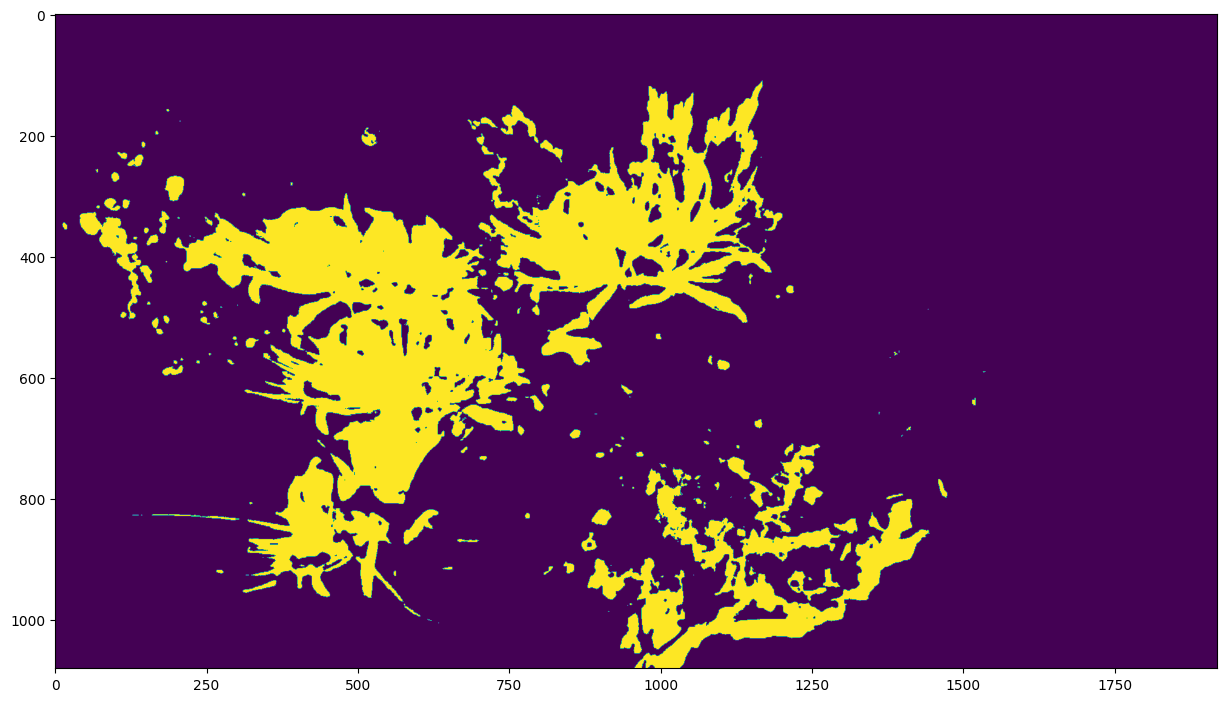

In [ ]:
plt.figure(figsize=(15.,10.))
plt.imshow(Image.fromarray(our_array, mode="L"))